In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns 
from matplotlib.ticker import NullFormatter
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sys 

In [2]:
dataset = pd.read_csv('/Users/nafalismac/Downloads/ScoringTraining.csv')
dataset.drop('Unnamed: 0',axis =1,inplace = True)
dataset.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
dataset.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# I - Phase de prétraitement

## 1 - proportion de défauts

In [4]:
means = dataset['SeriousDlqin2yrs'].value_counts()/dataset.shape[0]
print(means)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64


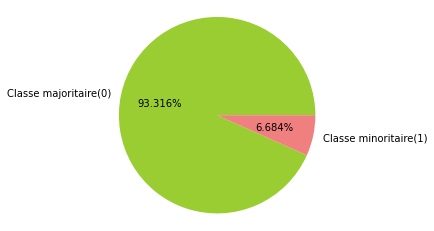

In [5]:
labels = 'Classe majoritaire(0)', 'Classe minoritaire(1)'
plt.pie([93.316,6.684],labels=labels,colors=['yellowgreen','lightcoral'],autopct='%1.3f%%')
plt.axis('equal')
plt.show()

In [6]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


1    0.5
0    0.5
Name: SeriousDlqin2yrs, dtype: float64


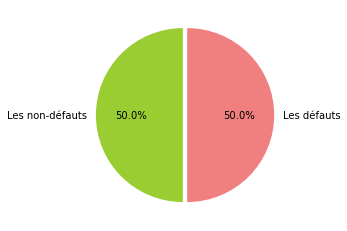

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rUs = RandomUnderSampler()

x_train = dataset.drop("SeriousDlqin2yrs",axis=1)
y_train = dataset["SeriousDlqin2yrs"]

x_t, y_t = rUs.fit_resample(x_train,y_train)

resampleddata = pd.concat([pd.DataFrame(y_t, columns=[dataset.columns[0]]),
                            pd.DataFrame(x_t, columns=dataset.columns[1:])], axis=1)

means = resampleddata['SeriousDlqin2yrs'].value_counts()/resampleddata.shape[0]
print(means)
values = resampleddata['SeriousDlqin2yrs'].value_counts()
labels='Les non-défauts','Les défauts'
plt.pie(values,explode=(0.05,0),labels=labels,colors=['yellowgreen','lightcoral'],startangle=90,autopct='%1.1f%%')
plt.show()

## 2- Les données aberrantes en utilisant les boites à moustache

## Les boites à moustache

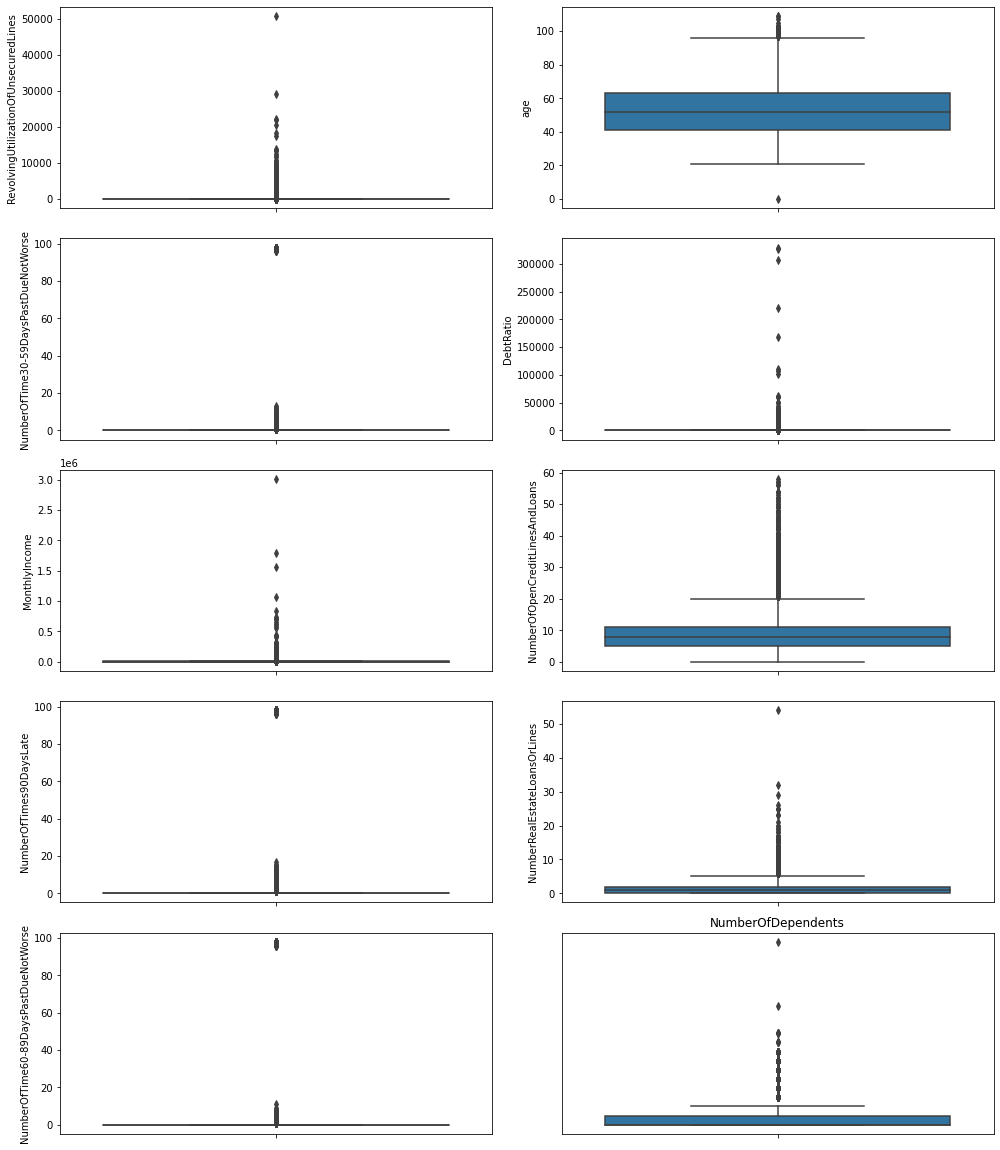

In [55]:
from matplotlib.ticker import NullFormatter
fig1 = plt.figure(figsize=(14, 16))

plt.subplot(5,2,1)
sns.boxplot(y='RevolvingUtilizationOfUnsecuredLines', data=dataset) 
plt.subplot(5,2,2)

sns.boxplot(y='age', data=dataset) 
plt.subplot(5,2,3)

sns.boxplot(y='NumberOfTime30-59DaysPastDueNotWorse', data=dataset) 
plt.subplot(5,2,4)
sns.boxplot(y='DebtRatio', data=dataset) 
plt.subplot(5,2,5)
sns.boxplot(y='MonthlyIncome', data=dataset) 
plt.subplot(5,2,6)
sns.boxplot(y='NumberOfOpenCreditLinesAndLoans', data=dataset) 
plt.subplot(5,2,7)
sns.boxplot(y='NumberOfTimes90DaysLate', data=dataset) 
plt.subplot(5,2,8)
sns.boxplot(y='NumberRealEstateLoansOrLines', data=dataset) 
plt.subplot(5,2,9)
sns.boxplot(y='NumberOfTime60-89DaysPastDueNotWorse', data=dataset) 
plt.subplot(5,2,10)
sns.boxplot(y='NumberOfDependents', data=dataset) 
plt.title('NumberOfDependents')

d = plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()

plt.show()

## Suppression des valeurs aberrantes

In [9]:
print(x_train.columns)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [10]:
cols = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberRealEstateLoansOrLines',
       'NumberOfDependents']

In [49]:
Q1 = resampleddata[cols].quantile(0.25)
Q3 = resampleddata[cols].quantile(0.75)
IQR = Q3 - Q1
resampleddata= resampleddata[~((resampleddata[cols] < (Q1 - 1.5 * IQR)) |(resampleddata[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
resampleddata['NumberOfTime30-59DaysPastDueNotWorse'] = resampleddata[resampleddata['NumberOfTime30-59DaysPastDueNotWorse']<20]

resampleddata['NumberOfTimes90DaysLate'] = resampleddata[resampleddata['NumberOfTimes90DaysLate']<20]

resampleddata['NumberOfTime60-89DaysPastDueNotWorse'] = resampleddata[resampleddata['NumberOfTime60-89DaysPastDueNotWorse']<20]


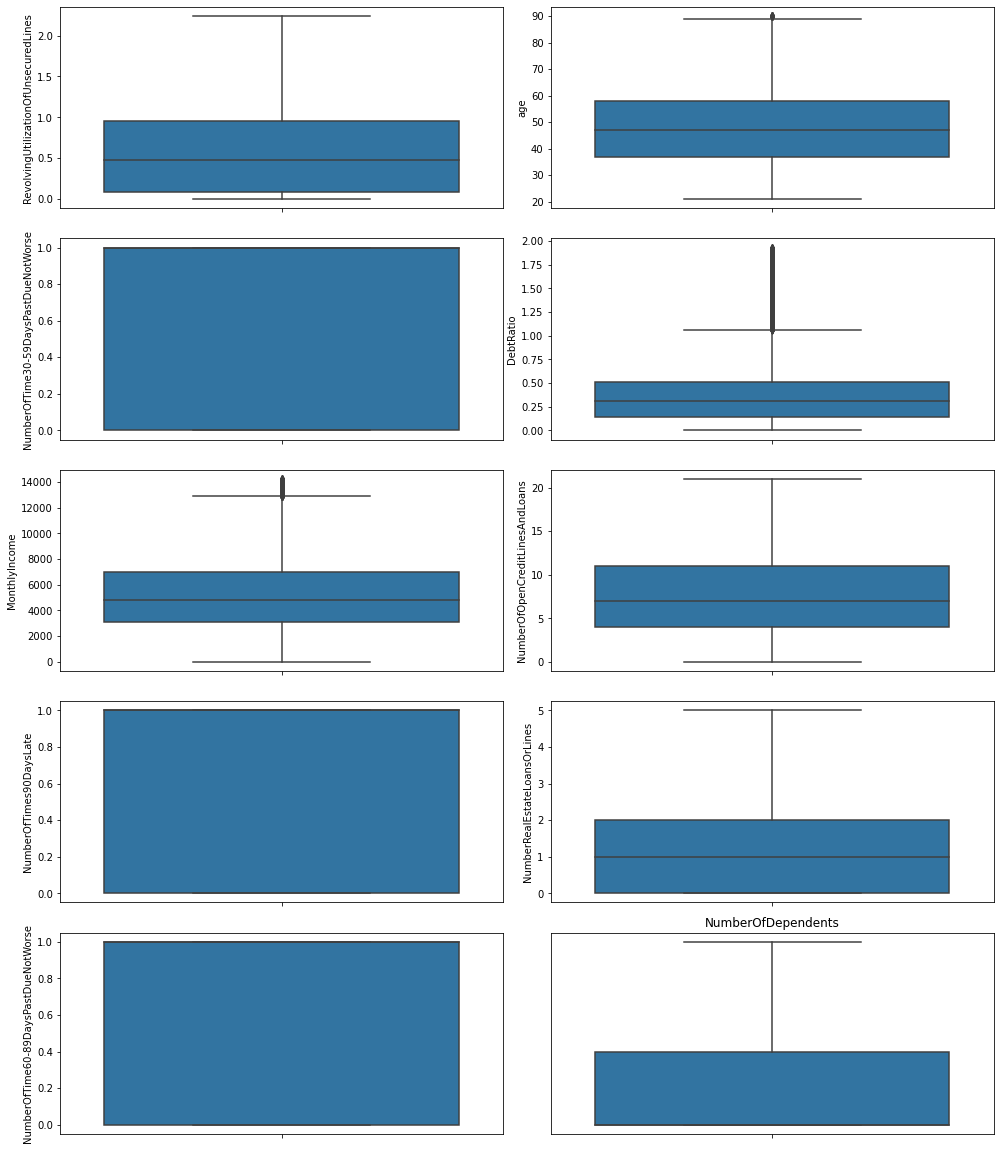

In [54]:
fig1 = plt.figure(figsize=(14, 16))

plt.subplot(5,2,1)
sns.boxplot(y='RevolvingUtilizationOfUnsecuredLines', data=resampleddata) 
plt.subplot(5,2,2)

sns.boxplot(y='age', data=resampleddata) 
plt.subplot(5,2,3)

sns.boxplot(y='NumberOfTime30-59DaysPastDueNotWorse', data=resampleddata) 
plt.subplot(5,2,4)
sns.boxplot(y='DebtRatio', data=resampleddata) 
plt.subplot(5,2,5)
sns.boxplot(y='MonthlyIncome', data=resampleddata) 
plt.subplot(5,2,6)
sns.boxplot(y='NumberOfOpenCreditLinesAndLoans', data=resampleddata) 
plt.subplot(5,2,7)
sns.boxplot(y='NumberOfTimes90DaysLate', data=resampleddata) 
plt.subplot(5,2,8)
sns.boxplot(y='NumberRealEstateLoansOrLines', data=resampleddata) 
plt.subplot(5,2,9)
sns.boxplot(y='NumberOfTime60-89DaysPastDueNotWorse', data=resampleddata) 
plt.subplot(5,2,10)
sns.boxplot(y='NumberOfDependents', data=resampleddata) 
plt.title('NumberOfDependents')

d = plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()

plt.show()

## 3- Les valeurs manquantes

In [58]:
resampleddata.shape

(14960, 11)

In [57]:
resampleddata.isnull().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse    132
DebtRatio                                 0
MonthlyIncome                           237
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                 132
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse    132
NumberOfDependents                       46
dtype: int64

In [59]:
resampleddata.isnull().sum()/14960

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.008824
DebtRatio                               0.000000
MonthlyIncome                           0.015842
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.008824
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.008824
NumberOfDependents                      0.003075
dtype: float64

# Heatmap pour visualiser les valeurs manquantes :

<AxesSubplot:>

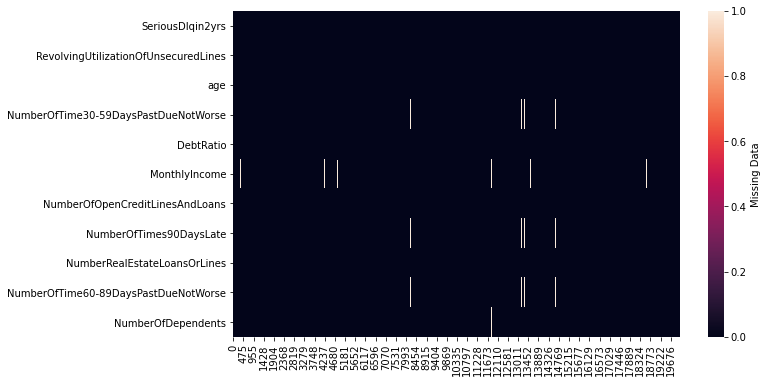

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(resampleddata.isna().transpose(),
            cbar_kws={'label': 'Missing Data'})

### Replacing missing values with means 

In [61]:
updated_data = resampleddata
for col in ['MonthlyIncome',
            'NumberOfDependents',
            'NumberOfTime30-59DaysPastDueNotWorse',
            'NumberOfTimes90DaysLate',
            'NumberOfTime60-89DaysPastDueNotWorse'] :
    updated_data[col]=updated_data[col].fillna(updated_data[col].mean())

In [62]:
updated_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

<AxesSubplot:>

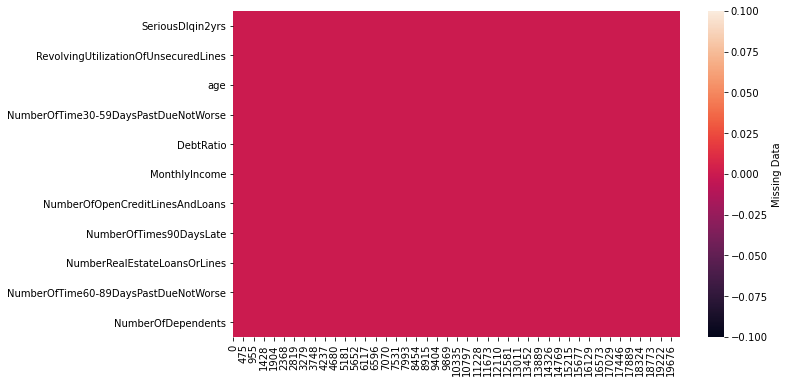

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(updated_data.isna().transpose(),
            cbar_kws={'label': 'Missing Data'})

## Identification des meilleurs prédicteurs parmi les variables :

### Representation des 2 classes pour chaque variable par les boxplots:


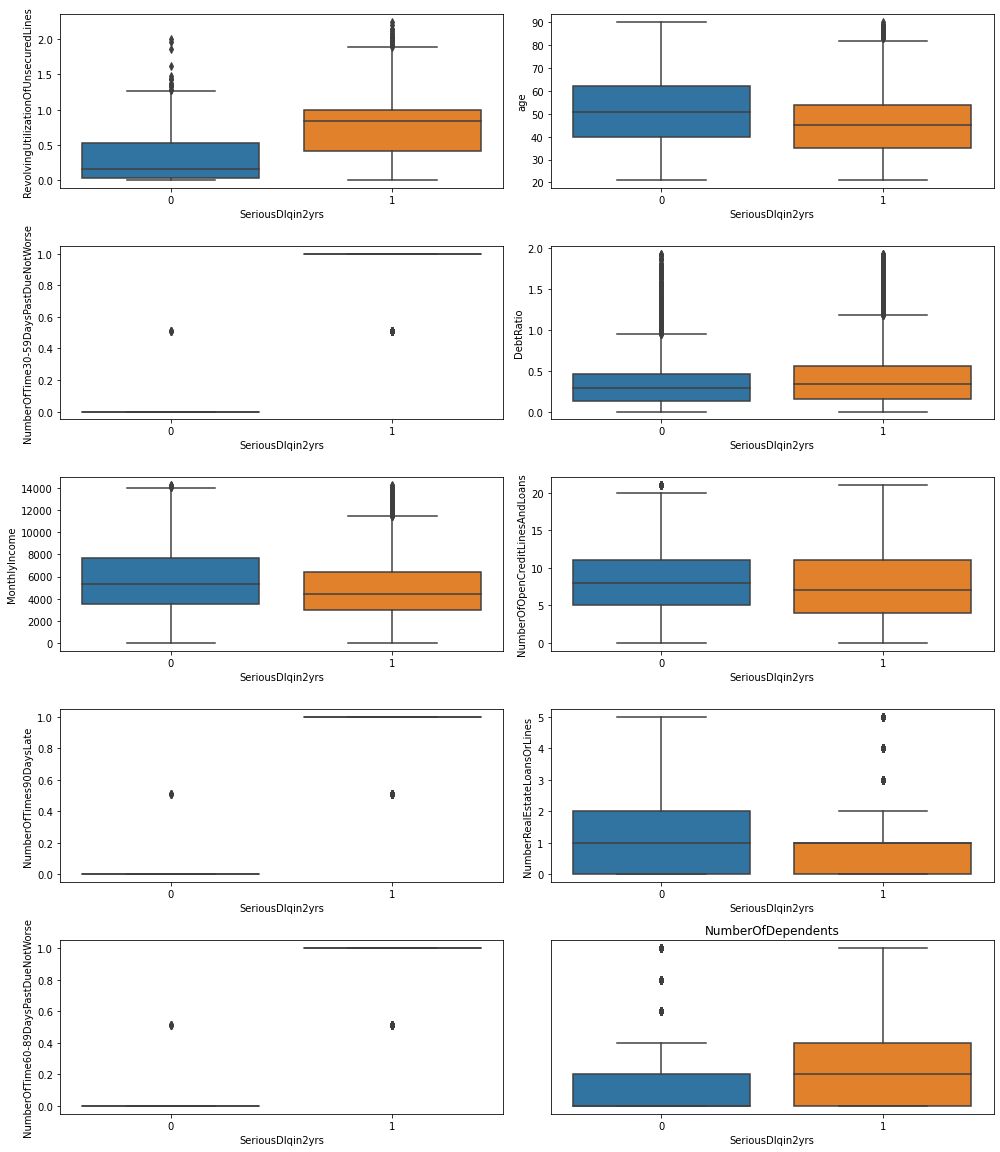

In [69]:
fig1 = plt.figure(figsize=(14, 16))

plt.subplot(5,2,1)
sns.boxplot(x='SeriousDlqin2yrs', y='RevolvingUtilizationOfUnsecuredLines', data=resampleddata) 
plt.subplot(5,2,2)

sns.boxplot(x='SeriousDlqin2yrs', y='age', data=resampleddata) 
plt.subplot(5,2,3)

sns.boxplot(x='SeriousDlqin2yrs', y='NumberOfTime30-59DaysPastDueNotWorse', data=resampleddata) 
plt.subplot(5,2,4)

sns.boxplot(x='SeriousDlqin2yrs', y='DebtRatio', data=resampleddata) 
plt.subplot(5,2,5)

sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=resampleddata) 
plt.subplot(5,2,6)

sns.boxplot(x='SeriousDlqin2yrs', y='NumberOfOpenCreditLinesAndLoans', data=resampleddata) 
plt.subplot(5,2,7)

sns.boxplot(x='SeriousDlqin2yrs', y='NumberOfTimes90DaysLate', data=resampleddata) 
plt.subplot(5,2,8)

sns.boxplot(x='SeriousDlqin2yrs', y='NumberRealEstateLoansOrLines', data=resampleddata) 
plt.subplot(5,2,9)

sns.boxplot(x='SeriousDlqin2yrs', y='NumberOfTime60-89DaysPastDueNotWorse', data=resampleddata) 
plt.subplot(5,2,10)

sns.boxplot(x='SeriousDlqin2yrs', y='NumberOfDependents', data=resampleddata) 
plt.title('NumberOfDependents')

d = plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()

plt.show()

# II-Modèles de prévsion

## 1 -  Cross-validation

In [74]:
from sklearn.model_selection import train_test_split

X = resampleddata.drop("SeriousDlqin2yrs", axis = 1)
y = resampleddata["SeriousDlqin2yrs"]

X.shape, y.shape

((14960, 10), (14960,))

In [105]:
#Découper la dataset en 80% pour l'entrainement et 20% pour le test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11968, 10) (11968,)
(2992, 10) (2992,)


In [113]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

lda = LinearDiscriminantAnalysis(n_components=1)
score_lda = lda.fit(X_train,y_train).transform(X_train)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)

/Users/nafalismac/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

### regression logistique

In [114]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
lr

LogisticRegression(max_iter=10000)

### Autres types de modèle

In [132]:
#Support Vector Classifier
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1, random_state=0)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

Text(0, 0.5, 'Accuracy')

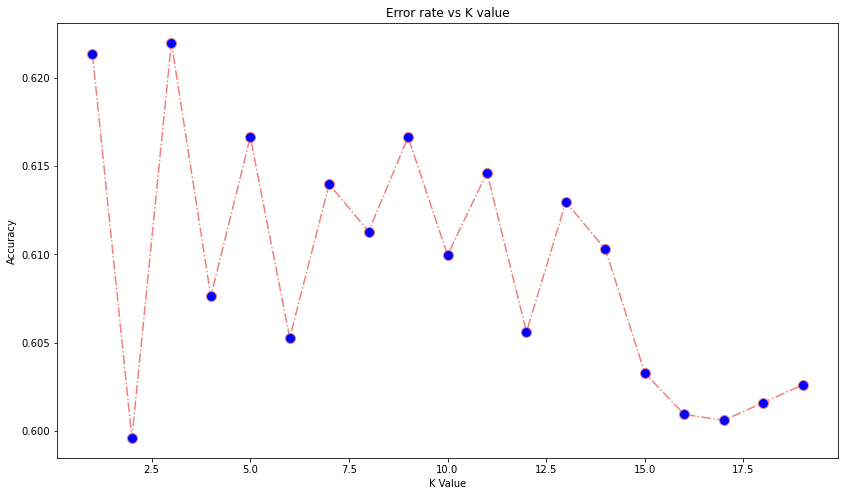

In [118]:
#Nearest neighbors classifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier

accuracy=[]
error=[]
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(np.mean(pred_i == y_test))
plt.figure(figsize=(14, 8))
plt.plot(range(1, 20), accuracy, color='lightcoral', linestyle='dashdot', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [119]:
#Le meilleur cas pour une grande accuracy est knn = 3
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_knn_pred = KNN.predict(X_test)

In [127]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(max_depth=2, random_state=0)
rfs.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [128]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dst = DecisionTreeClassifier(random_state=0)
dst.fit(X, y)

DecisionTreeClassifier(random_state=0)

# III-Phase d'evaluation 

### Goodness of fit

In [155]:
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)

lda_scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
qda_scores = cross_val_score(qda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
lr_scores = cross_val_score(lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
knn_scores = cross_val_score(KNN, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
rfs_scores = cross_val_score(rfs, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
dst_scores = cross_val_score(dst, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#svc_scores = cross_val_score(svc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('La précision moyenne de LDA: %.3f (%.3f)' % (np.mean(lda_scores), np.std(lda_scores)))
print('La précision moyenne de QDA: %.3f (%.3f)' % (np.mean(qda_scores), np.std(qda_scores)))
print('La précision moyenne du regression logistique: %.3f (%.3f)' % (np.mean(lr_scores), np.std(lr_scores)))
print('La précision moyenne de Knn: %.3f (%.3f)' % (np.mean(knn_scores), np.std(knn_scores)))
print('La précision moyenne de RFS: %.3f (%.3f)' % (np.mean(rfs_scores), np.std(rfs_scores)))
print('La précision moyenne de DST: %.3f (%.3f)' % (np.mean(dst_scores), np.std(dst_scores)))
#print('La précision moyenne de SVM: %.3f (%.3f)' % (np.mean(svc_scores), np.std(svc_scores)))

La précision moyenne de LDA: 0.999 (0.001)
La précision moyenne de QDA: 0.599 (0.123)
La précision moyenne du regression logistique: 0.999 (0.001)
La précision moyenne de Knn: 0.621 (0.012)
La précision moyenne de RFS: 0.999 (0.001)
La précision moyenne de DST: 0.999 (0.001)


In [169]:
# SeriousDlqin2yrs predicted for each model 

y_lda = lda.predict(X)
y_qda = qda.predict(X)
y_lr = lr.predict(X)
y_knn = KNN.predict(X)
y_rfs = rfs.predict(X)
y_dst = dst.predict(X)
y_svm = svc.predict(X)

## Pouvoir de prédiction

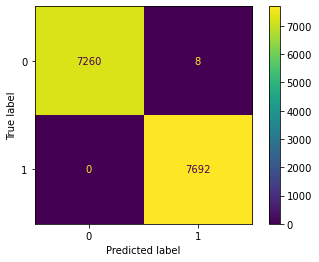

In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#LDA
cm = confusion_matrix(y, y_lda, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()


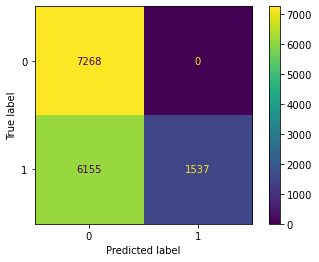

In [162]:
#QDA
cm = confusion_matrix(y, y_qda, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

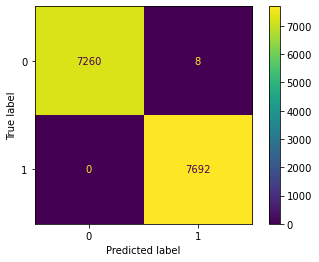

In [163]:
#Regression_logistique
cm = confusion_matrix(y, y_lr, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

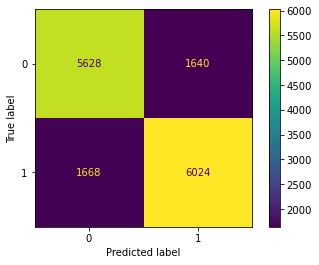

In [165]:
#Nearest neighbors classifier
cm = confusion_matrix(y, y_knn, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

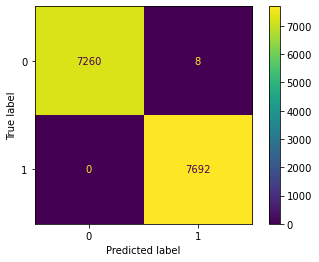

In [166]:
#Random forest model
cm = confusion_matrix(y, y_rfs, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

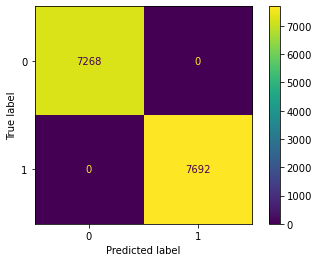

In [167]:
#Decision Tree model
cm = confusion_matrix(y, y_dst, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

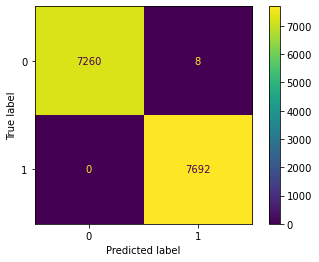

In [170]:
#Support Vector model

cm = confusion_matrix(y, y_svm, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()